Résultats avec un gamma de 0,95 :

- Le nombre moyen de pas est de 58 et de 12 en cas de victoire
- La quantité de pas stagne autour des 100.
- On a une récompense qui se situe très rapidement entre -120 et 0 dès 2000 épisodes.
- Le taux de réussite du modèle est de 48% après entrainement

In [7]:
from pathlib import Path

from common.params import TaxiDriverParams
from common.algorithms import QLearning, SARSA
from common.policies import DecayedEpsilonGreedy
from common.environments import TaxiDriver
from common.plots import TaxiDriverPlots

In [8]:
params = TaxiDriverParams(
    n_episodes=10000,
    n_runs=100,
    learning_rate=0.85,
    gamma=0.95,
    epsilon=1.0,
    min_epsilon=0.001,
    random_seed=True,
    seed=123,
    max_n_steps=100,
    savefig_folder=Path("./static/img/taxi_driver/"),
    savemodel_folder=Path("./static/models/taxi_driver/"),
)

In [9]:
env = TaxiDriver(params).env

In [10]:
algorithm = QLearning(
    env=env,
    params=params,
    policy=DecayedEpsilonGreedy(
        initial_epsilon=params.epsilon,
        min_epsilon=params.min_epsilon,
        n_episodes=params.n_episodes,
        manual_decay_rate=0.001,
    ),
)

In [11]:
algorithm.run()

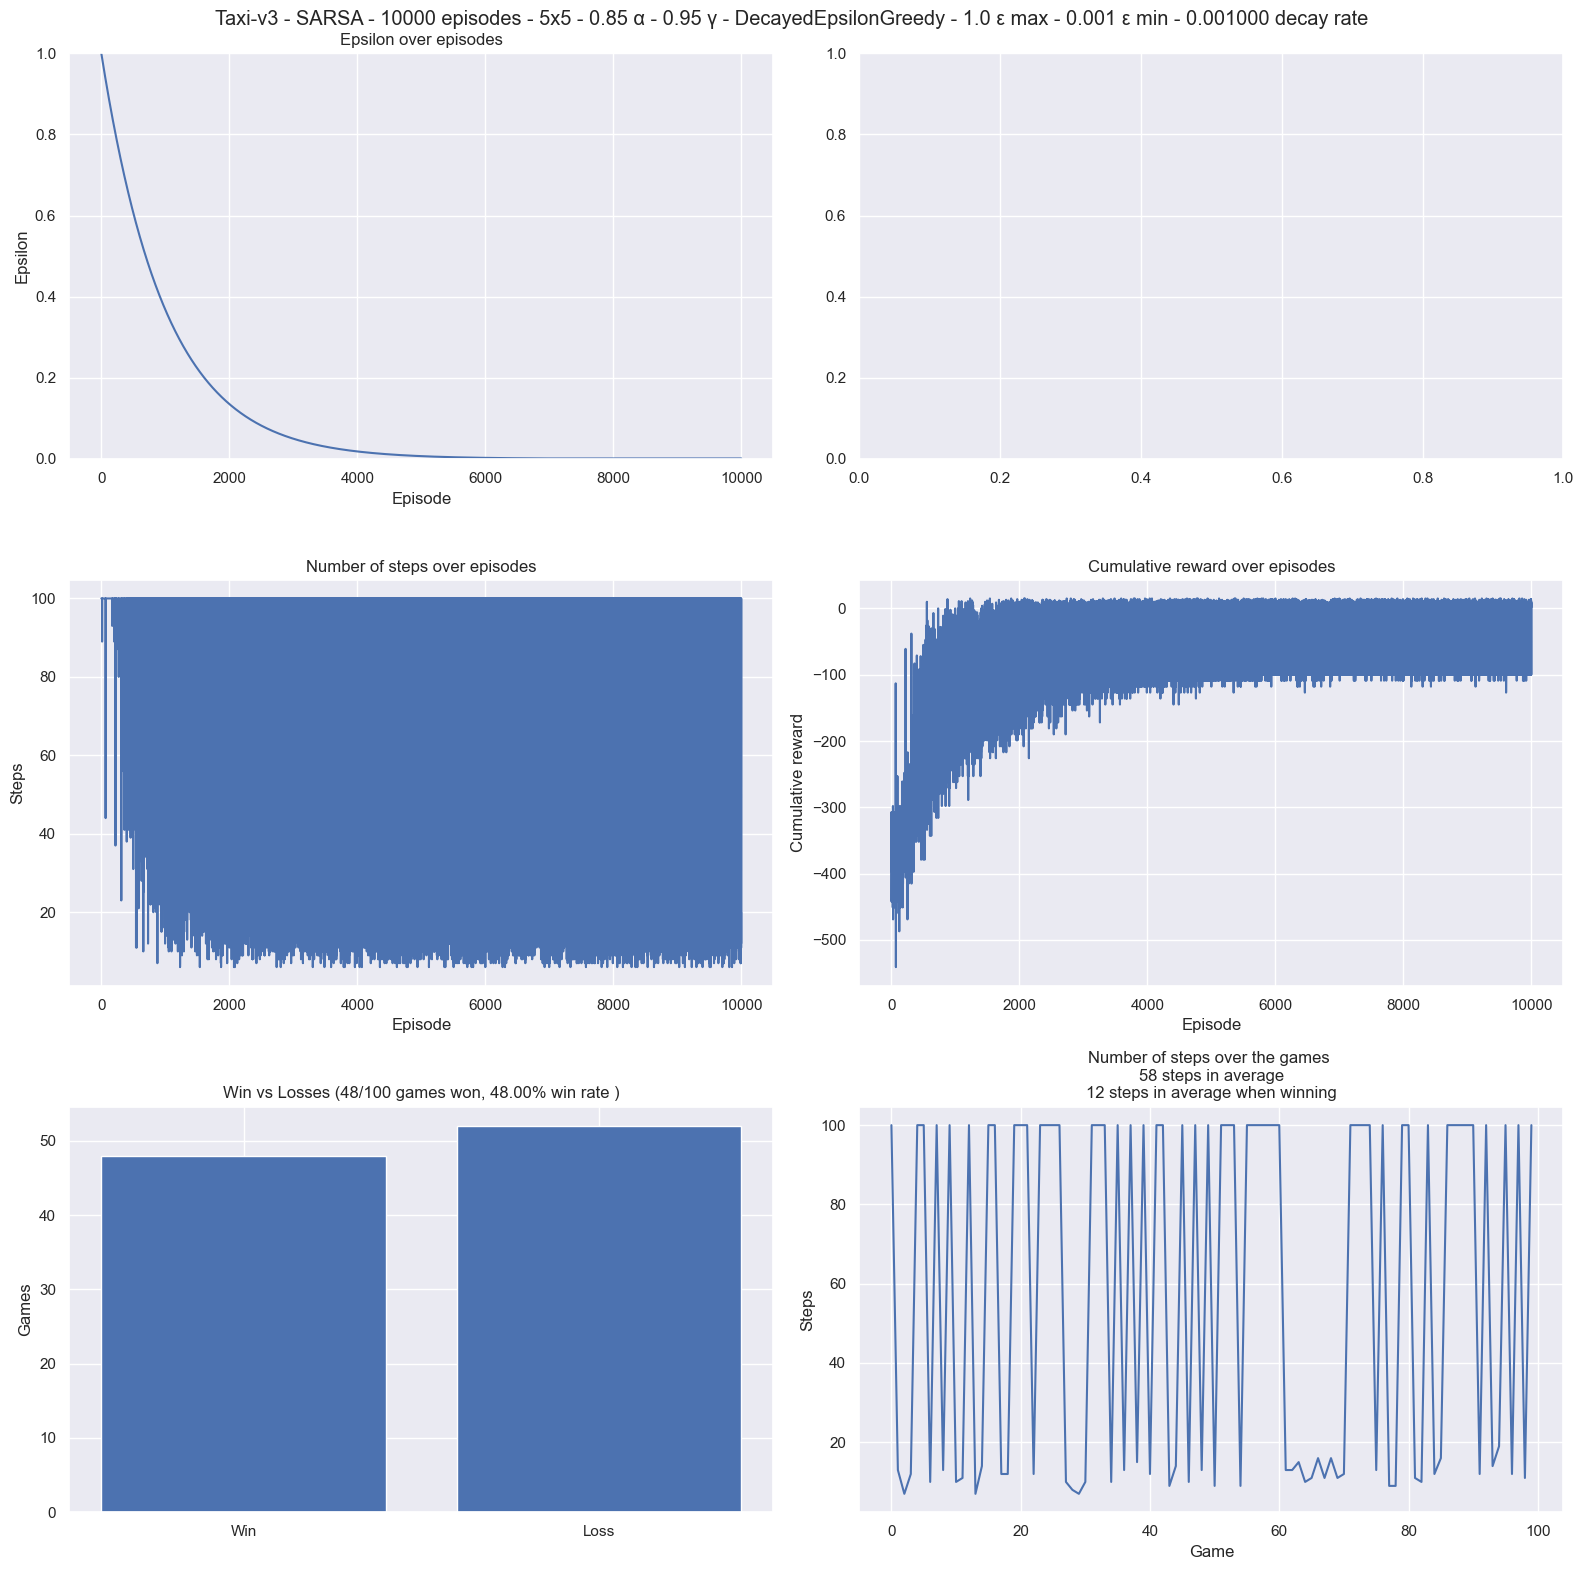

In [12]:
TaxiDriverPlots.plot(
    policy=algorithm.computed_policy,
    algorithm=algorithm,
    env=env,
    params=params,
)